In [1]:
import sys

import matplotlib.pyplot as plt
import pandas as pd
import torch

sys.path.append("..")

from neural_rk.path import DATA_DIR

In [2]:
def extract_delta_trajectories(df: pd.DataFrame) -> torch.Tensor:
    """
    Extract delta trajectories from given dataframe

    Return
    delta_trajectories: [num_data, state_dim], what neural_rk should predict
    """
    delta_trajectories: list[torch.Tensor] = []
    for _, series in df.iterrows():
        delta_trajectory = torch.divide(  # [S, N, state_dim]
            series.trajectories[1:] - series.trajectories[:-1], series.dts[:, None]
        )
        delta_trajectories.append(delta_trajectory.reshape(-1, 2))

    return torch.cat(delta_trajectories, dim=0)  # [num_data, state_dim]

In [3]:
name = "A"
df_train = pd.read_pickle(DATA_DIR / f"burgers_{name}_train.pkl")
df_val = pd.read_pickle(DATA_DIR / f"burgers_{name}_val.pkl")
df_test = pd.read_pickle(DATA_DIR / f"burgers_{name}_test.pkl")

train_y = extract_delta_trajectories(df_train).numpy()
val_y = extract_delta_trajectories(df_val).numpy()
test_y = extract_delta_trajectories(df_test).numpy()


# Statistics over samples

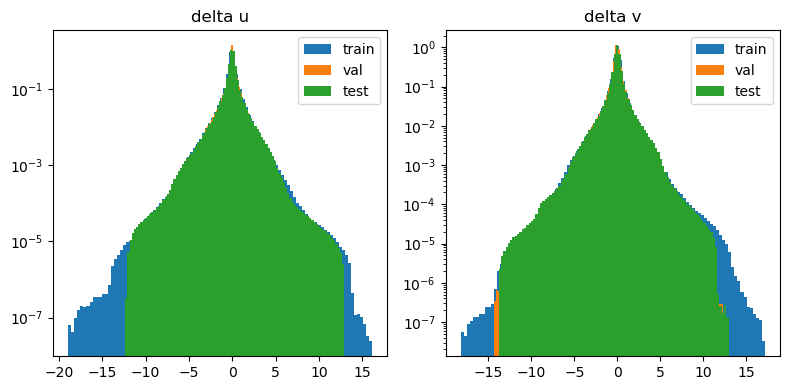

In [4]:
fig, (ax1, ax2) = plt.subplots(figsize=(8, 4), ncols=2)

ax1.set_title("delta u")
ax1.hist(train_y[..., 0], bins=100, label="train", density=True)
ax1.hist(val_y[..., 0], bins=100, label="val", density=True)
ax1.hist(test_y[..., 0], bins=100, label="test", density=True)
ax1.legend()
ax1.set_yscale("log")

ax2.set_title("delta v")
ax2.hist(train_y[..., 1], bins=100, label="train", density=True)
ax2.hist(val_y[..., 1], bins=100, label="val", density=True)
ax2.hist(test_y[..., 1], bins=100, label="test", density=True)
ax2.legend()
ax2.set_yscale("log")


fig.tight_layout()
fig.show()